# **IMDB 리뷰 데이터셋**

유명 인터넷 영화 데이터 베이스은 imdb.com에서 수집한 리뷰를 긍정, 부정으로 분류한 데이터 셋

총 50,000개 -> 각각 25,000

*자연어 처리(natural language processing, NLP)는 컴퓨터로 인간의 언어를 처리하는 분야

**자연어 처리 분야에서는 훈련 데이터를 종종 말뭉치(corpus)라고 부름

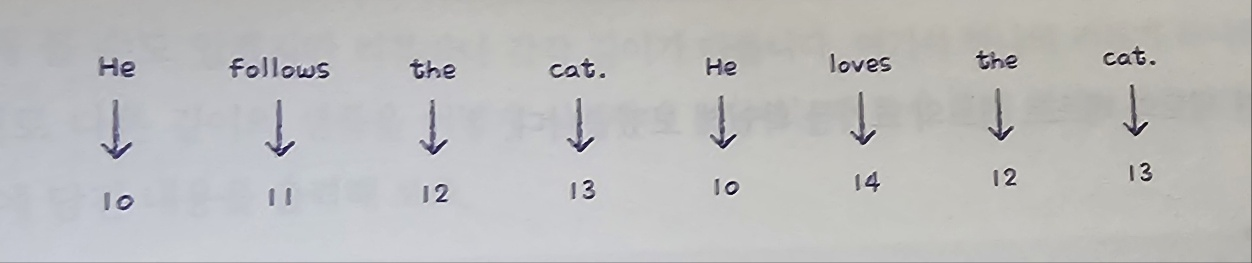

텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 방법을 사용하는데, 단어마다 고유한 정수를 부여한다.

단어에 매핑되는 정수는 단어의 의미나 크기와 관련이 없다.

즉, 정숫값 사이에는 어떠한 관계도 없다.

일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리한다.

이렇게 분리한 단어를 토큰(token)이라고 부르며 하나의 샘플은 여러개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스탬프에 헤당한다.

토큰에 할당하는 정수 중에 몇 개는 특정한 용도로 예약되어 있는 경우가 있다.

0 : 패딩

1 : 문장의 시작

2 : 어휘 사전에 없는 토큰

*어휘 사전 : 훈련세트에서 고유한 단어를 뽑아 만든 목록, 테스트 세트 안에 어휘 사전에 없는 단어가 있다면 2로 변환함

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target) , (test_input, test_target) = imdb.load_data(num_words=500) ##전체 데이터 셋에 가장 자주 등장하는 단어 500개만 사용
##imdb.load_data는 전체 어휘 사전에 있는 단어를 등장 횟수를 순서대로 나열하여 많이 등장한 순서대로 단어 선택

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)
##데이터가 1차원 => 리뷰의 크기 고정 x => 2차원 배열 X, 리뷰마다 별도으 파이썬 리스트 == 메모리 효율적

(25000,) (25000,)


In [3]:
print(len(train_input[0]), len(train_input[1]))
##첫 번째 리뷰와 두 번째 리뷰의 길이

218 189


In [4]:
print(train_input[0]) ##내용 출력

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
print(train_target[:20]) ##리뷰가 긍정인지 부정인지
## 0 : 부정
## 1 : 긍정

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
##20% 즉 5000개는 검증 세트

In [7]:
##리뷰의 길이 확인
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


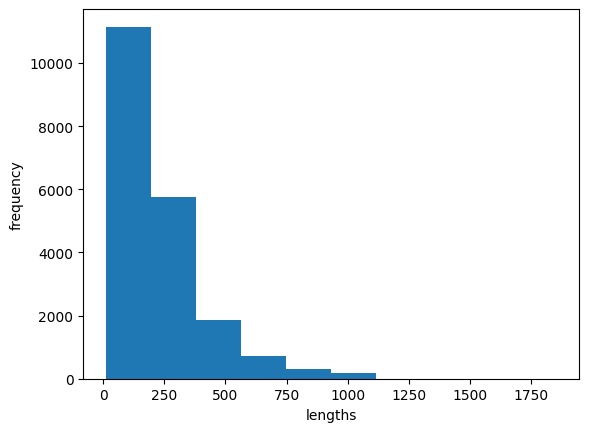

In [8]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

위 그래프를 보면 대부분의 데이터가 300 미만이다.

따라서 우리는 100개의 단어만 사용해서 리뷰를 활용할 것이다.

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100) ##최대 글자수 100으로

In [10]:
print(train_seq.shape)
##이제 train_seq는 2차원 배열

(20000, 100)


In [11]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


샘플의 앞 뒤에 패딩 값 0이 없는 것으로 보아 100보다는 긴 리뷰였을 것이다.

In [12]:
print(train_input[0][-10:])
##뒤의 토큰 값이 잘린 것과 비교하여 일치하기 때문에 train_seq는 앞이 잘린 데이터이다.

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


pad_sequence는 maxlen보다 긴 시퀀스의 앞을 자른다. 왜냐하면 뒤의 정보가 더 유용하다고 기대하기 때문

시퀸스의 뒷부분을 자르고 싶으면 pad_sequences() 함수의 truncating 매개변수의 값을 'pre'가 아닌 'post'로 변경하면 된다.

In [13]:
print(train_seq[5])
##100이 넘지 않기에 패딩으로 0이 들어감

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [14]:
val_seq = pad_sequences(val_input, maxlen = 100)
##검증 데이터도 100으로 맞춤

# **순환 신경망 만들기**

In [15]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
##SimpleRNN에서는 기본 activation 매개변수의 기본값이 tanh을 사용한다.
model.add(keras.layers.Dense(1,activation = 'sigmoid'))

**input_shape의 두 번째 차원 500의 의미?**

- 토큰을 정수로 변환한 데이터를 신경망에 넣을 경우 큰 정수가 큰 활성화 출력을 만들 수 있다.

- 따라서 정숫값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하는 방법으로 **원-핫 인코딩**을 사용한다.

*원-핫 인코딩 : 정숫값을 배열에서 해당 정수 위치의 원소만 1이고 나며지를 모두 0으로 변환하는 것

우리는 데이터 사전에서 500개의 단어만 사용하도록 지정했기 때문에 고유한 단어는 모두 500개이다.

즉 훈련 데이터에서 포함될 수 있는 정숫값 범위는 0(패딩 토큰) ~ 499까지 이다.

따라서 이 범위를 원-핫 인코딩으로 표현하면 배열의 길이가 500이어야 한다.

In [16]:
train_oh = keras.utils.to_categorical(train_seq)

In [17]:
print(train_oh.shape)

(20000, 100, 500)


In [18]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [19]:
print(np.sum(train_oh[0][0]))
##원-핫 인코딩으로 원소가 하나가 1이고 나머지가 0인 것을 확인할 수 있다.

1.0


In [20]:
val_oh = keras.utils.to_categorical(val_seq)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


입력 토큰 500차원 원-핫 인코딩 배열

500 x 8 = 4000개의 가중치

은닉층

8(은닉 상태 크기) x 8(뉴런 개수) = 64

뉴런마다 하나의 절현  +8

4000 + 64 + 8 = 4072

# **순환 신경망 훈련**

In [22]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
##코렙에서 하는 경우 TPU로 사용해야함 다른 것은 전부 RAM사용 초과

In [23]:
history = model.fit(train_oh,train_target, epochs=100, batch_size=64, validation_data=(val_oh,val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 29ms/step - loss: 0.7094 - accuracy: 0.4961 - val_loss: 0.7045 - val_accuracy: 0.4928
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.7016 - accuracy: 0.5039 - val_loss: 0.6993 - val_accuracy: 0.4992
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6962 - accuracy: 0.5117 - val_loss: 0.6956 - val_accuracy: 0.5058
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6919 - accuracy: 0.5260 - val_loss: 0.6926 - val_accuracy: 0.5188
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6883 - accuracy: 0.5388 - val_loss: 0.6898 - val_accuracy: 0.5248
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6849 - accuracy: 0.5515 - val_loss: 0.6872 - val_accuracy: 0.5398
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6811 - accuracy: 0.5640 - val_loss: 0.6841 - val_accuracy

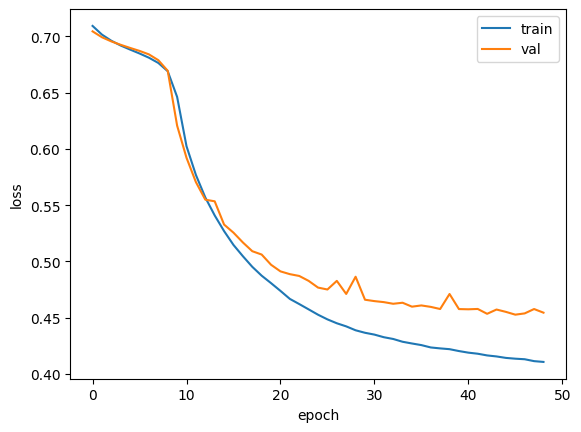

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

In [25]:
print(train_seq.nbytes,train_oh.nbytes)
##원-핫 인코딩의 단정음 입력 데이터가 엄청 커지는 것

8000000 4000000000


# **단어 임베딩**

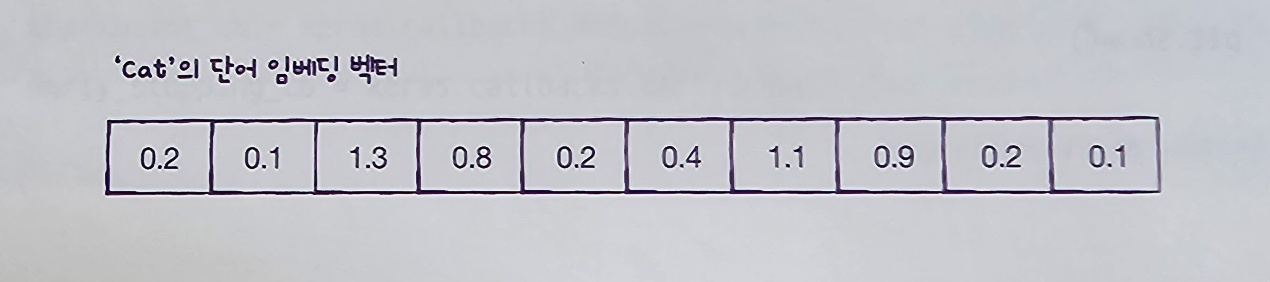

단어 임베딩이란 각 단어를 고정되 크기의 실수 벡터로 바꿔주는 것이다.

단어 임베딩으로 만들어진 벡터는 원-핫 인코딩 벡터보다 훨씬 의미 있는 값으로 채워져 있어 자연어 처리에서 더 좋은 성능을 낸다.

In [54]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length = 100,embeddings_regularizer=keras.regularizers.l2(0.001))) ##16은 임베딩 벡터의 크기
model2.add(keras.layers.SimpleRNN(8,dropout=0.5,kernel_regularizer=keras.regularizers.l2(0.002))) ##overfitting이 너무 크게 일어나 드롭아웃 + 정규화(L2) 적용
model2.add(keras.layers.Dense(1,activation = 'sigmoid'))

In [55]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8209 (32.07 KB)
Trainable params: 8209 (32.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


500개의 토큰을 크기가 16인 벡터로 변경

500 x 16 = 8,000개의 파라미터

임베딩 벡터의 크기가 16이므로 8개의 뉴련과 곱하기 위한 가중치

16 x 8 = 128

은닉 상태에 곱해지는 가중치

8 x 8 = 64

마지막 8개의 절편

+8

순환층의 파라미터 모델의 개수

128 + 64 + 8 = 200개

In [56]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop,loss = 'binary_crossentropy',metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_embedding-model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5,restore_best_weights = True)
history = model2.fit(train_seq,train_target,epochs = 100,batch_size = 128, validation_data = (val_seq, val_target),callbacks = [checkpoint_cb,early_stopping_cb])

Epoch 1/100
157/157 [==============================] - 5s 26ms/step - loss: 0.7227 - accuracy: 0.5057 - val_loss: 0.7214 - val_accuracy: 0.5000
Epoch 2/100
157/157 [==============================] - 4s 24ms/step - loss: 0.7194 - accuracy: 0.5129 - val_loss: 0.7184 - val_accuracy: 0.5078
Epoch 3/100
157/157 [==============================] - 4s 23ms/step - loss: 0.7164 - accuracy: 0.5229 - val_loss: 0.7160 - val_accuracy: 0.5210
Epoch 4/100
157/157 [==============================] - 4s 23ms/step - loss: 0.7127 - accuracy: 0.5387 - val_loss: 0.7138 - val_accuracy: 0.5310
Epoch 5/100
157/157 [==============================] - 4s 24ms/step - loss: 0.7106 - accuracy: 0.5435 - val_loss: 0.7113 - val_accuracy: 0.5390
Epoch 6/100
157/157 [==============================] - 4s 24ms/step - loss: 0.7074 - accuracy: 0.5549 - val_loss: 0.7091 - val_accuracy: 0.5496
Epoch 7/100
157/157 [==============================] - 4s 23ms/step - loss: 0.7056 - accuracy: 0.5562 - val_loss: 0.7068 - val_accuracy:

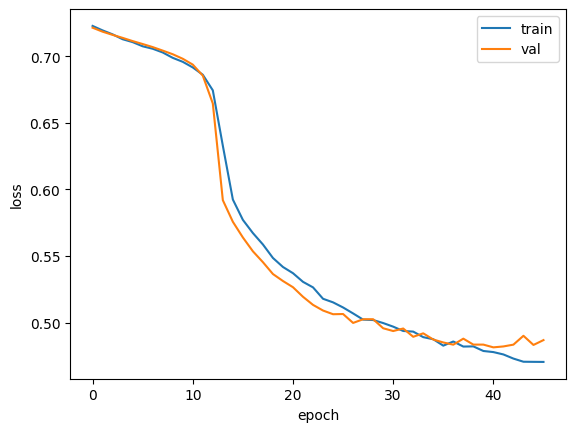

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()